# System tools to herd the dumps into something useful

In [1]:
%pylab nbagg

import os
import re

from topas2numpy import read_ntuple
from datetime import datetime
from pylab import figure, cm
from matplotlib.colors import LogNorm
import numpy as np 
import matplotlib.pyplot as plt 


Populating the interactive namespace from numpy and matplotlib


## Making a new analysis directory

In [7]:
now = datetime.now()

dt_string = now.strftime("%Y-%m-%d-h%Hm%M")

print(dt_string)

os.mkdir(f'analysis/{dt_string}')

2020-06-05-h13m30


In [8]:
y = read_ntuple('PhotodiodeSurface.phsp')
y.dtype.names

('Position X [cm]',
 'Position Y [cm]',
 'Position Z [cm]',
 'Direction Cosine X',
 'Direction Cosine Y',
 'Energy [MeV]',
 'Weight',
 'Particle Type (in PDG Format)',
 'Flag to tell if Third Direction Cosine is Negative (1 means true)',
 'Flag to tell if this is the First Scored Particle from this History (1 means true)',
 'Event ID',
 'Parent ID')

In [9]:
particle_type = y['Particle Type (in PDG Format)']
event_id = y['Event ID']
xx = y['Position X [cm]']
yy = y['Position Y [cm]']

In [10]:
xedges = np.linspace(-1.5876,1.5876,82)
yedges = np.linspace(-1.5876,1.5876,82)

<IPython.core.display.Javascript object>


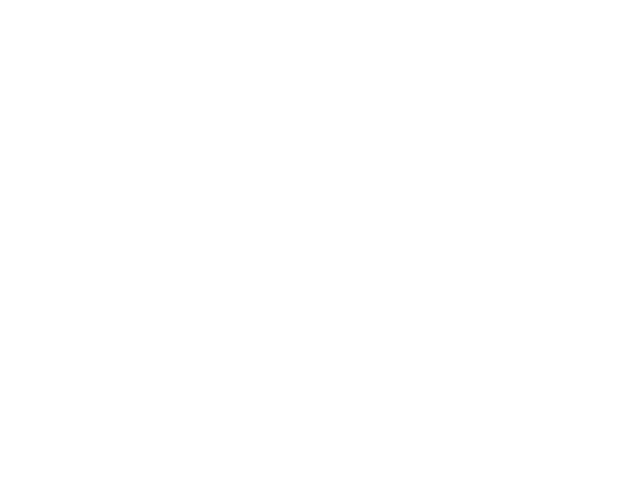

In [11]:
plt.figure()

visible = particle_type == 0

xx_visible = xx[visible]
yy_visible = yy[visible]
event_visible = event_id[visible]

for ii in range(int(max(event_id))):

    indeces = event_visible == ii

    if sum(indeces) > 0:

        plt.hist2d(xx_visible[indeces],yy_visible[indeces], bins = [xedges,yedges],
             cmap=cm.jet)
        plt.savefig(f'analysis/{dt_string}/{ii}.png')
        plt.clf()

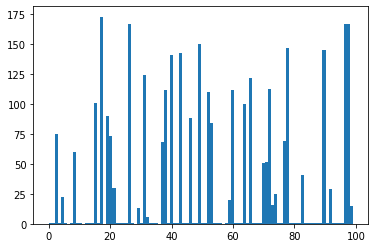

In [15]:

plt.figure()
plt.hist(event_id,bins=100);


<IPython.core.display.Javascript object>


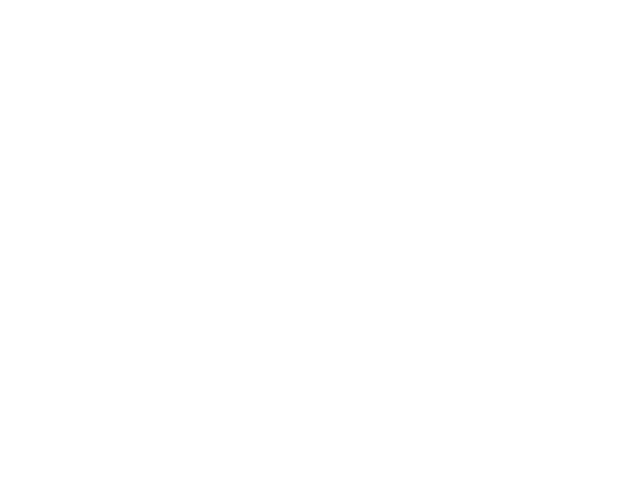

PhotodiodeSurface-6000keV.phsp


In [20]:
rootdir = "."
regex = re.compile('(.*phsp$)|(.*rar$)|(.*r01$)')

phase_spaces = []
plt.figure()

xedges = np.linspace(-1.5876,1.5876,82)
yedges = np.linspace(-1.5876,1.5876,82)

n = 0
for root, dirs, files in os.walk(rootdir):
    for file in sorted(files,reverse=True):
        if regex.match(file):
            
            print(file)
            
            y = read_ntuple(file)
            
            for ii in range(10000):
                
                xx = [y[kk][0] for kk in range(n,n+10000)]
                yy = [y[kk][1] for kk in range(n,n+10000)]
                
                if ii == 0:
                    h,xs,yx = np.histogram2d(xx,yy, bins = [xedges,yedges])
                else:
                    h2,xs,yx = np.histogram2d(xx,yy, bins = [xedges,yedges])
                    
                    h += h2

    #             plt.title(f'{file}')
    #             plt.savefig(f'analysis/{dt_string}/{file}.png')

#                 np.save(f'analysis/{dt_string}/{file}',h)

                n += 10000
            
            break

In [64]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = sorted(glob.glob("analysis/2020-06-04-h08m58/*.png"))

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [19]:
xx = np.array([y[kk][0] for kk in range(y.size)])
yy = np.array([y[kk][1] for kk in range(y.size)])

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


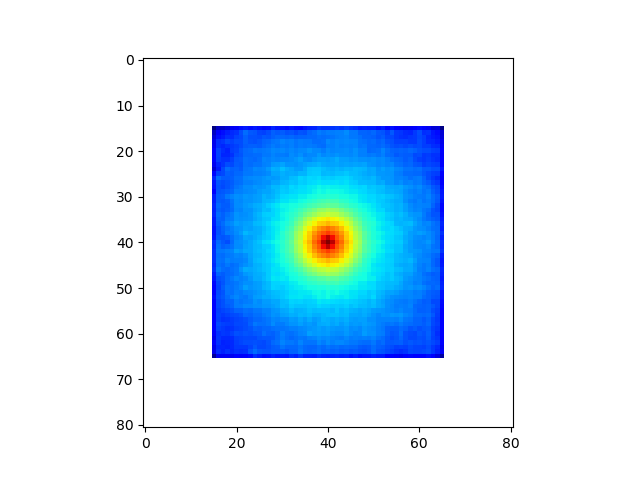

In [21]:
file = 'PhotodiodeSurface-6000keV.phsp'

plt.figure()
plt.imshow(h, cmap=cm.jet, norm=LogNorm())
plt.savefig(f'analysis/{dt_string}/{file}.png')

np.save(f'analysis/{dt_string}/{file}',h)

In [14]:
file

'EnergyDeposition.png'